This lab on Cross-Validation is a python adaptation of p. 190-194 of "Introduction to Statistical Learning
with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani. Written
by R. Jordan Crouser at Smith College for SDS293: Machine Learning (Spring 2016).

# 5.3.1 The Validation Set Approach

In [39]:
import pandas as pd
import numpy as np
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt
%matplotlib inline

In this section, we'll explore the use of the validation set approach in order to estimate the
test error rates that result from fitting various linear models on the ${\tt Auto}$ data set.

In [10]:
df1 = pd.read_csv('data/Auto.csv', na_values='?').dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


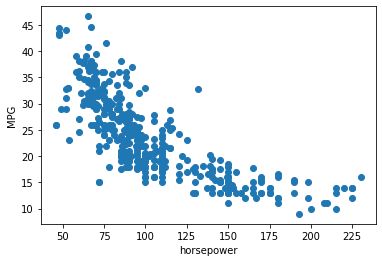

In [42]:
# probably worth plotting a figure of mpg vs horsepower
plt.scatter(df1["horsepower"], df1["mpg"])
plt.xlabel("horsepower"); plt.ylabel("MPG");

We begin by using the ${\tt sample()}$ function to split the set of observations
into two halves, by selecting a random subset of 196 observations out of
the original 392 observations. We refer to these observations as the training
set.

We'll use the ${\tt random\_state}$ parameter in order to set a seed for
${\tt python}$’s random number generator, so that you'll obtain precisely the same results each time. It is generally a good idea to set a random seed when performing an analysis such as cross-validation
that contains an element of randomness, so that the results obtained can be reproduced precisely at a later time.

In [15]:
train_df = df1.sample(196, random_state = 1)
test_df = df1[~df1.isin(train_df)].dropna(how = 'all')

X_train = train_df['horsepower'].values.reshape(-1,1) # input argument value of -1 means shape is inferred 
y_train = train_df['mpg']
X_test = test_df['horsepower'].values.reshape(-1,1)
y_test = test_df['mpg']

array([[ 97],
       [ 75],
       [ 75],
       [112],
       [ 67],
       [ 83],
       [ 69],
       [150],
       [ 92],
       [ 72],
       [115],
       [ 76],
       [130],
       [ 70],
       [ 84],
       [140],
       [ 84],
       [ 48],
       [220],
       [100],
       [ 75],
       [110],
       [150],
       [170],
       [198],
       [150],
       [ 68],
       [100],
       [110],
       [ 84],
       [145],
       [ 88],
       [155],
       [112],
       [105],
       [140],
       [ 95],
       [105],
       [ 67],
       [ 88],
       [190],
       [175],
       [122],
       [100],
       [100],
       [110],
       [150],
       [ 68],
       [100],
       [215],
       [150],
       [ 95],
       [ 90],
       [ 84],
       [ 62],
       [ 97],
       [115],
       [ 85],
       [ 90],
       [ 60],
       [ 85],
       [ 86],
       [ 65],
       [110],
       [ 90],
       [ 90],
       [ 88],
       [160],
       [ 71],
       [180],
       [ 92],
      

We then use ${\tt LinearRegression()}$ to fit a linear regression to predict ${\tt mpg}$ from ${\tt horsepower}$ using only
the observations corresponding to the training set.

In [16]:
lm = skl_lm.LinearRegression()
model = lm.fit(X_train, y_train)

We now use the ${\tt predict()}$ function to estimate the response for the test
observations, and we use ${\tt sklearn}$ to caclulate the MSE.

In [17]:
pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, pred)
    
print(MSE)

23.361902892587224


**Note:** The MSE value here is different than that in the book because we're probably splitting the data in different test and train sets due to the likely different seeds for the random number generators.

Therefore, the estimated test MSE for the linear regression fit is 23.36. We
can use the ${\tt PolynomialFeatures()}$ function to estimate the test error for the polynomial
and cubic regressions.

In [22]:
from sklearn.preprocessing import PolynomialFeatures

# Quadratic
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

model = lm.fit(X_train2, y_train)
print(mean_squared_error(y_test, model.predict(X_test2)))

# Cubic
poly = PolynomialFeatures(degree=3)
X_train3 = poly.fit_transform(X_train)
X_test3 = poly.fit_transform(X_test)

model = lm.fit(X_train3, y_train)
print(mean_squared_error(y_test, model.predict(X_test3)))

19.72253347049252
19.921367860017877


These error rates are 20.25 and 20.33, respectively. If we choose a different
training set instead, then we will obtain somewhat different errors on the
validation set. We can test this out by setting a different random seed:

In [23]:
train_df = df1.sample(196, random_state = 2)
test_df = df1[~df1.isin(train_df)].dropna(how = 'all')

X_train = train_df['horsepower'].values.reshape(-1,1)
y_train = train_df['mpg']
X_test = test_df['horsepower'].values.reshape(-1,1)
y_test = test_df['mpg']

# Linear
model = lm.fit(X_train, y_train)
print(mean_squared_error(y_test, model.predict(X_test)))

# Quadratic
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

model = lm.fit(X_train2, y_train)
print(mean_squared_error(y_test, model.predict(X_test2)))

# Cubic
poly = PolynomialFeatures(degree=3)
X_train3 = poly.fit_transform(X_train)
X_test3 = poly.fit_transform(X_test)

model = lm.fit(X_train3, y_train)
print(mean_squared_error(y_test, model.predict(X_test3)))

25.10853905288967
19.72253347049252
19.921367860017877


Using this split of the observations into a training set and a validation
set, we find that the validation set error rates for the models with linear,
quadratic, and cubic terms are 25.11, 19.72, and 19.92, respectively.

These results are consistent with our previous findings: a model that
predicts ${\tt mpg}$ using a quadratic function of ${\tt horsepower}$ performs better than
a model that involves only a linear function of ${\tt horsepower}$, and there is
little evidence in favor of a model that uses a cubic function of ${\tt horsepower}$.

# 5.3.2 Leave-One-Out Cross-Validation

The LOOCV estimate can be automatically computed for any generalized linear model using the `LeaveOneOut()` and `KFold()` functions.

In [112]:
model = lm.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score, cross_val_predict, LeaveOneOut
loo = LeaveOneOut()
X = df1['horsepower'].values.reshape(-1,1)
y = df1['mpg'].values.reshape(-1,1)
scores = loo.get_n_splits(X)

from sklearn.model_selection import KFold

model = lm.fit(X, y)
crossvalidation = KFold(n_splits=392, random_state=None, shuffle=False)

scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)

print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Folds: 392, MSE: 24.231513517929226, STD: 36.79731503640535


In [32]:
cross_val_score?

Our cross-validation estimate for the test error is approximately 24.23. We can repeat this procedure for increasingly complex polynomial fits.
To automate the process, we use the `for()` function to initiate a for loop
which iteratively fits polynomial regressions for polynomials of order `i = 1`
to `i = 5` and computes the associated cross-validation error. 

This command may take a couple of minutes to run.

In [52]:
for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    model = lm.fit(X_current, y)
    scores = cross_val_score(model, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
#     scores = cross_val_score(model, X_current, y, cv=crossvalidation, n_jobs=1)
    
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))


Degree-1 polynomial MSE: 27.439933652339857, STD: 14.510250711281133
Degree-2 polynomial MSE: 21.235840055802118, STD: 11.797327528898292
Degree-3 polynomial MSE: 21.336606183328417, STD: 11.8443397146369
Degree-4 polynomial MSE: 21.353886994209773, STD: 11.986332342224673
Degree-5 polynomial MSE: 20.905646119059934, STD: 12.18560440073758


Here we see a sharp drop in the estimated test MSE between
the linear and quadratic fits, but then no clear improvement from using
higher-order polynomials.

**Note:** The scoring input argument "neg_mean_squared_error" is actually the MSE. I don't have any idea why they use this nomenclature.

# 5.3.3 k-Fold Cross-Validation

The `KFold` function can (intuitively) also be used to implement `k`-fold CV. Below we
use `k = 10`, a common choice for `k`, on the `Auto` data set. We once again set
a random seed and initialize a vector in which we will print the CV errors
corresponding to the polynomial fits of orders one to ten.

In [34]:
crossvalidation = KFold(n_splits=10, random_state=1, shuffle=False)

for i in range(1,11):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    model = lm.fit(X_current, y)
    scores = cross_val_score(model, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Degree-1 polynomial MSE: 27.439933652339857, STD: 14.510250711281133
Degree-2 polynomial MSE: 21.235840055802118, STD: 11.797327528898292
Degree-3 polynomial MSE: 21.336606183328417, STD: 11.8443397146369
Degree-4 polynomial MSE: 21.353886994209773, STD: 11.986332342224673
Degree-5 polynomial MSE: 20.905646119059934, STD: 12.18560440073758
Degree-6 polynomial MSE: 20.82189095906726, STD: 12.126258882595026
Degree-7 polynomial MSE: 20.953103378424785, STD: 12.059908521569556
Degree-8 polynomial MSE: 21.077131510426256, STD: 12.04447106023584
Degree-9 polynomial MSE: 21.03675183384266, STD: 11.948760351967676
Degree-10 polynomial MSE: 20.981013741561554, STD: 11.797365253121383


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Notice that the computation time is **much** shorter than that of LOOCV.
(In principle, the computation time for LOOCV for a least squares linear
model should be faster than for `k`-fold CV, due to the availability of the
formula (5.2) for LOOCV; however, unfortunately the `KFold()` function
does not make use of this formula.) We still see little evidence that using
cubic or higher-order polynomial terms leads to lower test error than simply
using a quadratic fit.

# An Application to Default Data

Now that you're armed with more useful technique for resampling your data, let's try fitting a model for the `Default` dataset:

In [79]:
df2 = pd.read_csv('data/default.csv', na_values='?').dropna()
df2.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


First we'll try just holding out a random 20% of the data:

In [80]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report

for i in range(1,11):
    train_df2 = df2.sample(8000, random_state = i)
    test_df2 = df2[~df2.isin(train_df2)].dropna(how = 'all')
    
    # Fit a logistic regression to predict default using balance
    model = smf.glm('default~balance', data=train_df2, family=sm.families.Binomial())
    result = model.fit()
    predictions_nominal = [ "Yes" if x < 0.5 else "No" for x in result.predict(test_df2)]
    print("----------------")
    print("Random Seed = " + str(i) + "")
    print("----------------")
    print(confusion_matrix(test_df2["default"], 
                       predictions_nominal))
    print(classification_report(test_df2["default"], 
                            predictions_nominal, 
                            digits = 3))
    print()
    

----------------
Random Seed = 1
----------------
[[1921    6]
 [  50   23]]
              precision    recall  f1-score   support

          No      0.975     0.997     0.986      1927
         Yes      0.793     0.315     0.451        73

    accuracy                          0.972      2000
   macro avg      0.884     0.656     0.718      2000
weighted avg      0.968     0.972     0.966      2000


----------------
Random Seed = 2
----------------
[[1919   13]
 [  47   21]]
              precision    recall  f1-score   support

          No      0.976     0.993     0.985      1932
         Yes      0.618     0.309     0.412        68

    accuracy                          0.970      2000
   macro avg      0.797     0.651     0.698      2000
weighted avg      0.964     0.970     0.965      2000


----------------
Random Seed = 3
----------------
[[1918   14]
 [  49   19]]
              precision    recall  f1-score   support

          No      0.975     0.993     0.984      1932
    

Our accuracy is really high on this data, but we're getting different error rates depending on how we choose our test set. That's no good!

Unfortunately this dataset is too big for us to run LOOCV, so we'll have to settle for `k`-fold. In the space below, build a logistic model on the full `Default` dataset and then run 5-fold cross-validation to get a more accurate estimate of your test error rate:

Lots and lots of syntax problems below. First, I wasn't able to use cross_val_score on a logistic regression model created using smf.glm, so I switched to sklearn's LogisticRegression. Next, there were all sorts of weird issues with the dependent variable y and its shape. I needed to convert column vector to a 1-D array...why??

In [127]:
# Your code here
from sklearn.linear_model import LogisticRegression

X = df2['balance'].values.reshape(-1, 1)
y = df2['default'].values.reshape(-1, 1)
# X = df2['balance'].values.ravel()
# y = df2['default'].values.ravel()
lr = LogisticRegression()
model = lr.fit(X, df2['default'].values.ravel())
# result = model.fit()
# predicted = cross_val_predict(LogisticRegression(), X, y, cv=5)
crossvalidation = KFold(n_splits=5, random_state=None, shuffle=False)
scores = cross_val_score(model, X, df2['default'].values.ravel(), scoring="accuracy", cv=crossvalidation)



print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Folds: 5, MSE: 0.9727, STD: 0.001166190378969061


# 5.3.4 The Bootstrap

We illustrate the use of the bootstrap in the simple example of Section 5.2,
as well as on an example involving estimating the accuracy of the linear
regression model on the `Auto`data set.

# Estimating the Accuracy of a Statistic of Interest

One of the great advantages of the bootstrap approach is that it can be
applied in almost all situations. No complicated mathematical calculations
are required. Performing a bootstrap analysis in R entails only two steps.

- First, we must create a function that computes the statistic of interest.
- Second, we use the `boot()` function, which is part of the boot library, to perform the bootstrap by repeatedly sampling observations from the data set with replacement.

The `Portfolio` data set in the `ISLR` package is described in Section 5.2. It has variables called `X` and `Y`. 

In [ ]:
portfolio_df = pd.read_csv('Portfolio.csv')
portfolio_df.head()

To illustrate the use of the bootstrap on this data, we must first create
a function, `alpha()`, which takes as input the data and outputs the estimate for $\alpha$ (described in more detail on page 187).

In [ ]:
def alpha(X,Y):
    return ((np.var(Y)-np.cov(X,Y))/(np.var(X)+np.var(Y)-2*np.cov(X,Y)))

This function returns, or outputs, an estimate for $\alpha$ based on applying
(5.7) to the observations indexed by the argument index. For instance, the
following command tells `python` to estimate $\alpha$ using all 100 observations.

In [ ]:
X = portfolio_df.X[0:100]
y = portfolio_df.Y[0:100]
print(alpha(X,y))

The next command uses the `sample()` function to randomly select 100 observations
from the range 1 to 100, with replacement. This is equivalent
to constructing a new bootstrap data set and recomputing $\hat{\alpha}$ based on the
new data set.

In [ ]:
dfsample = portfolio_df.sample(frac=1, replace=True)
X = dfsample.X[0:100]
y = dfsample.Y[0:100]
print(alpha(X,y))

We can implement a bootstrap analysis by performing this command many
times, recording all of the corresponding estimates for $\alpha$, and computing the resulting standard deviation. However, the `boot()`function automates
this approach. Below we produce $1,000$ bootstrap estimates for $\alpha$:

In [ ]:
def bstrap(df):
    tresult = 0
    for i in range(0,1000):
        dfsample = df.sample(frac=1, replace=True)
        X = dfsample.X[0:100]
        y = dfsample.Y[0:100]
        result = alpha(X,y)
        tresult += result
    fresult = tresult / 1000
    print(fresult)
bstrap(portfolio_df)

The final output shows that using the original data, $\hat{\alpha} = 0.58$, and that the bootstrap estimate for $SE(\hat{\alpha})$ is 0.18.

# Estimating the Accuracy of a Linear Regression Model

The bootstrap approach can be used to assess the variability of the coefficient
estimates and predictions from a statistical learning method. Here
we use the bootstrap approach in order to assess the variability of the
estimates for $\beta_0$ and $\beta_1$, the intercept and slope terms for the linear regression
model that uses horsepower to predict mpg in the Auto data set. We
will compare the estimates obtained using the bootstrap to those obtained
using the formulas for $SE(\hat{\beta}_0)$ and $SE(\hat{\beta}_1)$ described in Section 3.1.2.

First let's refresh our memory about a linear model of the `Auto` dataset:

In [ ]:
from sklearn.utils import resample

auto_df = pd.read_csv('Auto.csv')

auto_df.describe()

In [ ]:
lm = skl_lm.LinearRegression()
X = auto_df['horsepower'].values.reshape(-1,1)
y = auto_df['mpg']
clf = lm.fit(X,y)
print(clf.coef_, clf.intercept_)

Next, we use the `bootstrap()`function to compute the standard errors of 1,000
bootstrap estimates for the intercept and slope terms:

In [ ]:
from sklearn.metrics import mean_squared_error

Xsamp, ysamp = resample(X, y, n_samples=1000)
clf = lm.fit(Xsamp,ysamp)
print('Intercept: ' + str(clf.intercept_) + " Coef: " + str(clf.coef_))